In [301]:
#import required packages
#basics
import pandas as pd 
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

from nltk import wordnet

In [302]:
%pwd

'C:\\Users\\RAHUL\\PYTHON Assignment\\Data Science\\6. Analyzing online Job Postings'

In [303]:
job = pd.read_csv('data job posts.csv')

In [304]:
job.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [305]:
job.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

## Analyzing the data

In [306]:
import seaborn as sns

In [7]:
a = job.groupby(['Year']).jobpost.count().reset_index()

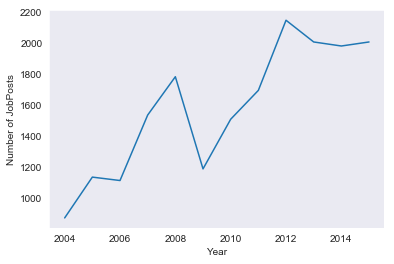

In [8]:
plt.xlabel('Year')
plt.ylabel('Number of JobPosts')
plt.plot('Year','jobpost',data=a)
plt.show()

In [9]:
a = job.groupby(['Month']).jobpost.count().reset_index()

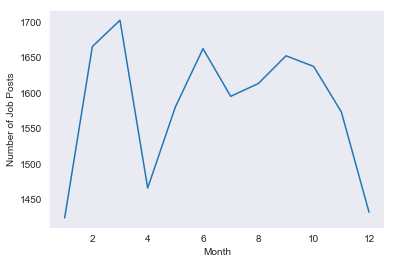

In [10]:
plt.xlabel('Month')
plt.ylabel('Number of Job Posts')
plt.plot('Month','jobpost',data=a)
plt.show()

In [11]:
a = job.groupby(['Year','Month']).jobpost.count().reset_index()

In [12]:
a.head()

,Year,Month,jobpost
0,2004,1,40
1,2004,2,59
2,2004,3,75
3,2004,4,67
4,2004,5,71


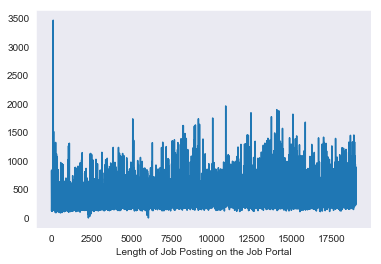

In [13]:
count = dict()
for vars in range(0,job.shape[0]):
    count[vars] = len(job.jobpost[vars].split())

a = pd.DataFrame(count,index=['Word Count']).T

plt.xlabel('Length of Job Posting on the Job Portal')
plt.plot(a)
plt.show()

In [14]:
job.head(3)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False


In [15]:
job.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [16]:
## There are 73 such Job postings which are duplicates
job.jobpost.value_counts().reset_index()[0:74]

,index,jobpost
0,Career Center NGO\nTITLE: English Language Co...,11
1,Career Center NGO\nTITLE: English Language Co...,9
2,Career Center NGO\nTITLE: English Language Co...,7
3,Career Center NGO\nTITLE: English Language Co...,7
4,Career Center NGO\nTITLE: Volunteer Registrat...,7
5,Career Center NGO\nTITLE: English Language Co...,4
6,Career Center NGO\nTITLE: English Language Co...,3
7,Career Center NGO\nTITLE: English Language Co...,3
8,Career Center NGO\nTITLE: English Language Co...,3
9,Trade House Euroset\nTITLE: IT Unit Manager\n...,2


### Data Audit

In [17]:
pandas_profiling.ProfileReport(job)

Number of variables,24
Number of observations,19001
Total Missing (%),30.0%
Total size in memory,3.4 MiB
Average record size in memory,185.0 B
Numeric,2
Categorical,21
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Dropping values due to too high Missing Values

In [322]:
job.drop(columns=['AnnouncementCode','Attach','Audience','Duration','Eligibility','Notes','Salary','StartDate','Term'],inplace=True)

#### Dropping Date Fields

In [323]:
job.drop(columns=['date','OpeningDate','Deadline'],inplace=True)

In [324]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'ApplicationP', 'AboutC', 'Year',
       'Month', 'IT', 'Armenia'],
      dtype='object')

In [21]:
job.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,AboutC,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...","To apply for this position, please submit a\nc...",NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,Please submit a cover letter and resume to:\nI...,The International Research & Exchanges Board (...,2004,1,False


## Data Preparation

In [22]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'ApplicationP', 'AboutC', 'Year',
       'Month', 'IT'],
      dtype='object')

In [23]:
a = job.Title.value_counts()
a

Accountant                                                                                                                         328
Chief Accountant                                                                                                                   219
Medical Representative                                                                                                             216
Sales Manager                                                                                                                      166
Administrative Assistant                                                                                                           155
Lawyer                                                                                                                             151
Software Developer                                                                                                                 134
Project Manager                                        

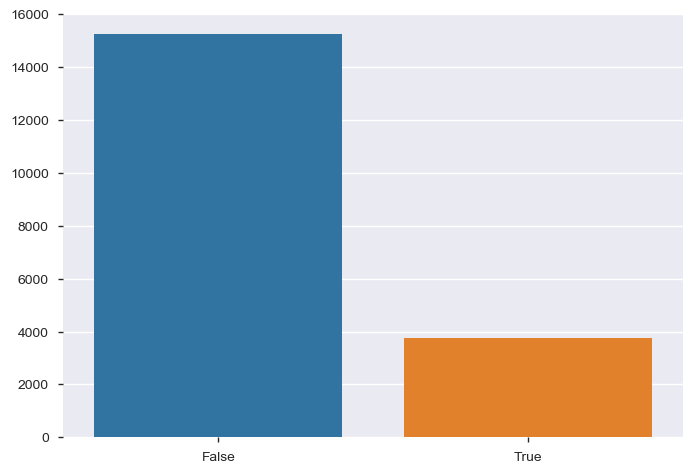

In [24]:
a = job.IT.value_counts()
sns.barplot(x=a.index,y=a.values)
plt.show()

## Data Cleaning

In [325]:
job.drop_duplicates(inplace=True)

In [326]:
job.drop(columns=['ApplicationP'],inplace=True)

In [327]:
job.shape

(18861, 12)

In [28]:
job.tail(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,Head of Online Sales Department,San Lazzaro LLC,"Yerevan, Armenia",San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,- At least 1 year of experience in online sale...,San Lazzaro LLC works with several internation...,2015,12,False
19000,"""Kamurj"" UCO CJSC\n\n\nTITLE: Lawyer in Legal...",Lawyer in Legal Department,"""Kamurj"" UCO CJSC","Yerevan, Armenia","""Kamurj"" UCO CJSC is looking for a Lawyer in L...",- Properly provide internal legal services of ...,- Higher legal education; Master's degree is a...,"""Kamurj"" UCO CJSC is providing micro and small...",2015,12,False


## Data Pre-Processing

### Removal of New Lines and Single Quotes

In [307]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub('\n', '', text)
    #text = re.sub('nan', '', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [308]:
job['jobpost'] = job['jobpost'].astype('str').apply(lambda x: clean_text(x))
job['Title'] = job['Title'].astype('str').apply(lambda x: clean_text(x))
job['Company'] = job['Company'].astype('str').apply(lambda x: clean_text(x))
job['Location'] = job['Location'].astype('str').apply(lambda x: clean_text(x))
job['JobRequirment'] = job['JobRequirment'].astype('str').apply(lambda x: clean_text(x))
job['JobDescription'] = job['JobDescription'].astype('str').apply(lambda x: clean_text(x))
job['RequiredQual'] = job['RequiredQual'].astype('str').apply(lambda x: clean_text(x))
job['AboutC'] = job['AboutC'].astype('str').apply(lambda x: clean_text(x))

In [309]:
job.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,ameria investment consulting companyjob title ...,"Jan 5, 2004",chief financial officer,ameria investment consulting company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,nan,NaN,2004,1,False
1,international research & exchanges board irext...,"Jan 7, 2004",fulltime community connections intern paid int...,international research & exchanges board irex,NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,the international research & exchanges board i...,NaN,2004,1,False


In [310]:
job['jobpost'] = job['jobpost'].apply(lambda x: x.replace('/',''))
job['Title'] = job['Title'].apply(lambda x: x.replace('/',''))
job['Company'] = job['Company'].apply(lambda x: x.replace('/',''))
job['Location'] = job['Location'].apply(lambda x: x.replace('/',''))
job['JobRequirment'] = job['JobRequirment'].apply(lambda x: x.replace('/',''))
job['JobDescription'] = job['JobDescription'].apply(lambda x: x.replace('/',''))
job['RequiredQual'] = job['RequiredQual'].apply(lambda x: x.replace('/',''))
job['AboutC'] = job['AboutC'].astype('str').apply(lambda x: x.replace('/',''))

### Remove punctuation

In [311]:
job['jobpost'] = job['jobpost'].apply(lambda x: x.replace('/',''))
job['Title'] = job['Title'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['Company'] = job['Company'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['Location'] = job['Location'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['JobRequirment'] = job['JobRequirment'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['JobDescription'] = job['JobDescription'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['RequiredQual'] = job['RequiredQual'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
job['AboutC'] = job['AboutC'].apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))

## 1.a. Types of Jobs that are in demand in Armenia

In [312]:
job.Location[0:4]

0                                      yerevan armenia
1    irex armenia main office yerevan armenia descr...
2                                      yerevan armenia
3                                   manila philippines
Name: Location, dtype: object

In [313]:
['armenia' in job.Location[3]]

[False]

In [314]:
job['Armenia'] = job.Location.apply(lambda x : 'armenia' in x)

In [315]:
a = job[job.Armenia == True].groupby(['Title']).jobpost.count().reset_index()
a.sort_values(by=['jobpost'],ascending=False,inplace=True)
a.head()

,Title,jobpost
15,accountant,324
4683,medical representative,219
1026,chief accountant,218
6303,sales manager,167
106,administrative assistant,155


### Remove English Stop Words

In [316]:
stop = set(nltk.corpus.stopwords.words('english'))

In [317]:
for var in ['armenian','armenia','job','title','position','location','responsibilities','application','procedures','deadline','required','qualifications','renumeration','salary','date','company','llc','yerevan']:
    stop.add(var)
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'application',
 'are',
 'aren',
 "aren't",
 'armenia',
 'armenian',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'company',
 'couldn',
 "couldn't",
 'd',
 'date',
 'deadline',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'job',
 'just',
 'll',
 'llc',
 'location',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off

In [318]:
job['jobpost'] = job['jobpost'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['Title'] = job['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['Company'] = job['Company'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['Location'] = job['Location'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['JobRequirment'] = job['JobRequirment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['JobDescription'] = job['JobDescription'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['RequiredQual'] = job['RequiredQual'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
job['AboutC'] = job['AboutC'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Lemmatization

In [319]:
job['jobpost'] = job['jobpost'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['Title'] = job['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['Company'] = job['Company'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['Location'] = job['Location'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['JobRequirment'] = job['JobRequirment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['JobDescription'] = job['JobDescription'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['RequiredQual'] = job['RequiredQual'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
job['AboutC'] = job['AboutC'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## 1.b. Jobs nature in Armenia changing with Time

In [320]:
a = job[job.Armenia == True].groupby(['Title','Year']).jobpost.count().reset_index()
a.sort_values(by=['jobpost'],ascending=False,inplace=True)
a.head(3)

,Title,Year,jobpost
6478,medical representative,2010,44
29,accountant,2007,39
30,accountant,2008,38


In [321]:
job.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT', 'Armenia'],
      dtype='object')

In [44]:
X = job.RequiredQual
y = job.IT

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14188,)
(4730,)
(14188,)
(4730,)


## Vectorization

In [45]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), 
                             min_df=1,
                             max_df=0.96,
                             encoding='latin-1',
                             stop_words=stop,
                             max_features=1500)
xtrain_count = count_vect.fit_transform(X_train)


## Create DTM

In [46]:
dtm=xtrain_count.toarray()
dtm = pd.DataFrame(dtm,columns=count_vect.get_feature_names())
dtm.head()

,abilitiesmay,abilitiesmay acquired,ability,ability accept,ability adapt,ability analyze,ability apply,ability build,ability communicate,ability complete,...,xml,year,year experience,year managerial,year practical,year professional,year related,year relevant,year work,year working
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Vectorization (count, tfidf) for both train & test

In [47]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), 
                             min_df=3,
                             max_df=0.70,
                             stop_words=stop,
                            max_features=1500)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [48]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [49]:
dtm2.head(3)

,abilitiesmay,abilitiesmay acquired,ability,ability accept,ability adapt,ability analyze,ability apply,ability build,ability communicate,ability complete,...,xml,year,year experience,year managerial,year practical,year professional,year related,year relevant,year work,year working
0,0.0,0.0,0.085396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.040995,0.0,0.0,0.0,0.0,0.0,0.1064,0.000000,0.0
1,0.0,0.0,0.073378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035226,0.0,0.0,0.0,0.0,0.0,0.0000,0.063877,0.0
2,0.0,0.0,0.092167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0


## KMeans Clustering

In [51]:
from sklearn.cluster import KMeans

k_range = range(4, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k,random_state=123,verbose=True)
    km.fit(X_train_tfidf)
    scores.append(metrics.silhouette_score(X_train_tfidf, km.labels_))

Initialization complete
Iteration  0, inertia 13811.694
Iteration  1, inertia 12881.087
Iteration  2, inertia 12871.702
Iteration  3, inertia 12852.222
Iteration  4, inertia 12825.527
Iteration  5, inertia 12796.152
Iteration  6, inertia 12774.193
Iteration  7, inertia 12766.580
Iteration  8, inertia 12763.188
Iteration  9, inertia 12760.502
Iteration 10, inertia 12757.293
Iteration 11, inertia 12753.635
Iteration 12, inertia 12749.246
Iteration 13, inertia 12744.580
Iteration 14, inertia 12740.702
Iteration 15, inertia 12738.368
Iteration 16, inertia 12736.573
Iteration 17, inertia 12735.325
Iteration 18, inertia 12734.502
Iteration 19, inertia 12733.906
Iteration 20, inertia 12733.420
Iteration 21, inertia 12733.047
Iteration 22, inertia 12732.780
Iteration 23, inertia 12732.527
Iteration 24, inertia 12732.303
Iteration 25, inertia 12732.007
Iteration 26, inertia 12731.513
Iteration 27, inertia 12730.843
Iteration 28, inertia 12730.470
Iteration 29, inertia 12730.152
Iteration 30, in

Iteration  0, inertia 24524.069
Iteration  1, inertia 12703.302
Iteration  2, inertia 12638.355
Iteration  3, inertia 12620.233
Iteration  4, inertia 12611.612
Iteration  5, inertia 12598.957
Iteration  6, inertia 12593.896
Iteration  7, inertia 12591.074
Iteration  8, inertia 12589.109
Iteration  9, inertia 12587.497
Iteration 10, inertia 12585.578
Iteration 11, inertia 12581.363
Iteration 12, inertia 12572.026
Iteration 13, inertia 12566.451
Iteration 14, inertia 12564.326
Iteration 15, inertia 12563.561
Iteration 16, inertia 12563.223
Iteration 17, inertia 12562.824
Iteration 18, inertia 12562.557
Iteration 19, inertia 12562.363
Iteration 20, inertia 12562.035
Iteration 21, inertia 12561.776
Iteration 22, inertia 12561.573
Iteration 23, inertia 12561.307
Iteration 24, inertia 12561.094
Iteration 25, inertia 12561.018
Iteration 26, inertia 12560.930
Iteration 27, inertia 12560.839
Iteration 28, inertia 12560.804
Iteration 29, inertia 12560.753
Iteration 30, inertia 12560.717
Iteratio

Iteration 15, inertia 12496.440
Iteration 16, inertia 12496.256
Iteration 17, inertia 12496.162
Iteration 18, inertia 12496.065
Iteration 19, inertia 12495.997
Iteration 20, inertia 12495.955
Iteration 21, inertia 12495.948
Iteration 22, inertia 12495.943
Iteration 23, inertia 12495.941
Iteration 24, inertia 12495.940
Iteration 25, inertia 12495.939
Iteration 26, inertia 12495.937
Iteration 27, inertia 12495.936
Converged at iteration 27: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 24207.812
Iteration  1, inertia 12652.428
Iteration  2, inertia 12591.142
Iteration  3, inertia 12563.167
Iteration  4, inertia 12548.648
Iteration  5, inertia 12539.562
Iteration  6, inertia 12534.671
Iteration  7, inertia 12532.350
Iteration  8, inertia 12531.241
Iteration  9, inertia 12530.178
Iteration 10, inertia 12520.880
Iteration 11, inertia 12516.369
Iteration 12, inertia 12510.634
Iteration 13, inertia 12505.626
Iteration 14, inertia 12504.3

Iteration 27, inertia 12774.295
Iteration 28, inertia 12774.225
Iteration 29, inertia 12774.169
Iteration 30, inertia 12774.127
Iteration 31, inertia 12774.042
Iteration 32, inertia 12773.987
Iteration 33, inertia 12773.947
Iteration 34, inertia 12773.914
Iteration 35, inertia 12773.894
Iteration 36, inertia 12773.691
Iteration 37, inertia 12773.679
Iteration 38, inertia 12773.668
Iteration 39, inertia 12773.666
Iteration 40, inertia 12773.665
Converged at iteration 40: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 24534.393
Iteration  1, inertia 12673.682
Iteration  2, inertia 12622.549
Iteration  3, inertia 12602.262
Iteration  4, inertia 12574.934
Iteration  5, inertia 12549.541
Iteration  6, inertia 12540.414
Iteration  7, inertia 12534.510
Iteration  8, inertia 12530.518
Iteration  9, inertia 12528.165
Iteration 10, inertia 12526.871
Iteration 11, inertia 12526.046
Iteration 12, inertia 12525.669
Iteration 13, inertia 12525.3

Iteration 36, inertia 12675.611
Iteration 37, inertia 12675.115
Iteration 38, inertia 12674.873
Iteration 39, inertia 12674.603
Iteration 40, inertia 12674.497
Iteration 41, inertia 12674.441
Iteration 42, inertia 12674.411
Iteration 43, inertia 12674.394
Iteration 44, inertia 12674.385
Iteration 45, inertia 12674.383
Iteration 46, inertia 12674.380
Converged at iteration 46: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 24111.057
Iteration  1, inertia 12631.186
Iteration  2, inertia 12545.442
Iteration  3, inertia 12515.962
Iteration  4, inertia 12491.733
Iteration  5, inertia 12481.922
Iteration  6, inertia 12476.539
Iteration  7, inertia 12472.334
Iteration  8, inertia 12470.375
Iteration  9, inertia 12469.699
Iteration 10, inertia 12469.390
Iteration 11, inertia 12469.226
Iteration 12, inertia 12469.086
Iteration 13, inertia 12468.852
Iteration 14, inertia 12468.692
Iteration 15, inertia 12468.615
Iteration 16, inertia 12468.5

Iteration  4, inertia 12406.958
Iteration  5, inertia 12404.118
Iteration  6, inertia 12402.831
Iteration  7, inertia 12401.593
Iteration  8, inertia 12400.502
Iteration  9, inertia 12399.102
Iteration 10, inertia 12398.038
Iteration 11, inertia 12397.006
Iteration 12, inertia 12396.062
Iteration 13, inertia 12395.021
Iteration 14, inertia 12393.947
Iteration 15, inertia 12393.020
Iteration 16, inertia 12392.471
Iteration 17, inertia 12392.033
Iteration 18, inertia 12391.733
Iteration 19, inertia 12391.510
Iteration 20, inertia 12391.330
Iteration 21, inertia 12391.163
Iteration 22, inertia 12390.961
Iteration 23, inertia 12390.866
Iteration 24, inertia 12390.770
Iteration 25, inertia 12390.697
Iteration 26, inertia 12390.654
Iteration 27, inertia 12390.559
Iteration 28, inertia 12390.438
Iteration 29, inertia 12390.362
Iteration 30, inertia 12390.201
Iteration 31, inertia 12389.656
Iteration 32, inertia 12386.365
Iteration 33, inertia 12385.983
Iteration 34, inertia 12385.635
Iteratio

Iteration  9, inertia 12424.710
Iteration 10, inertia 12423.287
Iteration 11, inertia 12421.730
Iteration 12, inertia 12419.417
Iteration 13, inertia 12418.029
Iteration 14, inertia 12416.582
Iteration 15, inertia 12415.275
Iteration 16, inertia 12413.741
Iteration 17, inertia 12412.268
Iteration 18, inertia 12411.047
Iteration 19, inertia 12409.880
Iteration 20, inertia 12408.859
Iteration 21, inertia 12408.202
Iteration 22, inertia 12407.620
Iteration 23, inertia 12406.962
Iteration 24, inertia 12406.216
Iteration 25, inertia 12405.507
Iteration 26, inertia 12404.680
Iteration 27, inertia 12403.957
Iteration 28, inertia 12403.170
Iteration 29, inertia 12401.822
Iteration 30, inertia 12400.356
Iteration 31, inertia 12398.613
Iteration 32, inertia 12395.761
Iteration 33, inertia 12393.056
Iteration 34, inertia 12390.337
Iteration 35, inertia 12388.203
Iteration 36, inertia 12387.076
Iteration 37, inertia 12386.281
Iteration 38, inertia 12385.448
Iteration 39, inertia 12385.103
Iteratio

Iteration 29, inertia 12333.809
Iteration 30, inertia 12333.802
Iteration 31, inertia 12333.795
Iteration 32, inertia 12333.791
Iteration 33, inertia 12333.787
Iteration 34, inertia 12333.787
Iteration 35, inertia 12333.786
Iteration 36, inertia 12333.785
Iteration 37, inertia 12333.784
Iteration 38, inertia 12333.784
Converged at iteration 38: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 13816.730
Iteration  1, inertia 12883.889
Iteration  2, inertia 12867.558
Iteration  3, inertia 12837.899
Iteration  4, inertia 12797.201
Iteration  5, inertia 12759.453
Iteration  6, inertia 12728.478
Iteration  7, inertia 12681.480
Iteration  8, inertia 12638.089
Iteration  9, inertia 12619.732
Iteration 10, inertia 12616.088
Iteration 11, inertia 12614.498
Iteration 12, inertia 12613.920
Iteration 13, inertia 12613.820
Iteration 14, inertia 12613.778
Iteration 15, inertia 12613.763
Iteration 16, inertia 12613.761
Iteration 17, inertia 12613.7

Iteration 15, inertia 12645.429
Iteration 16, inertia 12644.789
Iteration 17, inertia 12644.555
Iteration 18, inertia 12644.463
Iteration 19, inertia 12644.429
Iteration 20, inertia 12644.393
Iteration 21, inertia 12644.349
Iteration 22, inertia 12644.314
Iteration 23, inertia 12644.241
Iteration 24, inertia 12644.123
Iteration 25, inertia 12644.107
Iteration 26, inertia 12644.099
Iteration 27, inertia 12644.094
Converged at iteration 27: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 23253.534
Iteration  1, inertia 12551.776
Iteration  2, inertia 12466.666
Iteration  3, inertia 12395.782
Iteration  4, inertia 12356.932
Iteration  5, inertia 12338.387
Iteration  6, inertia 12328.741
Iteration  7, inertia 12324.319
Iteration  8, inertia 12322.346
Iteration  9, inertia 12320.825
Iteration 10, inertia 12319.064
Iteration 11, inertia 12316.197
Iteration 12, inertia 12315.794
Iteration 13, inertia 12315.529
Iteration 14, inertia 12315.3

Iteration 45, inertia 12623.900
Iteration 46, inertia 12623.603
Iteration 47, inertia 12623.213
Iteration 48, inertia 12622.563
Iteration 49, inertia 12621.647
Iteration 50, inertia 12620.653
Iteration 51, inertia 12619.572
Iteration 52, inertia 12618.622
Iteration 53, inertia 12617.944
Iteration 54, inertia 12617.502
Iteration 55, inertia 12617.285
Iteration 56, inertia 12617.205
Iteration 57, inertia 12617.172
Iteration 58, inertia 12617.161
Iteration 59, inertia 12617.157
Iteration 60, inertia 12617.150
Iteration 61, inertia 12617.145
Iteration 62, inertia 12617.138
Iteration 63, inertia 12617.137
Converged at iteration 63: center shift 0.000000e+00 within tolerance 6.077742e-08
Initialization complete
Iteration  0, inertia 23502.481
Iteration  1, inertia 12488.531
Iteration  2, inertia 12392.539
Iteration  3, inertia 12360.724
Iteration  4, inertia 12347.865
Iteration  5, inertia 12341.155
Iteration  6, inertia 12335.947
Iteration  7, inertia 12330.403
Iteration  8, inertia 12326.3

In [52]:
scores

[0.013781090547366414,
 0.012937129164590543,
 0.01434958741742205,
 0.004851506163878988,
 0.012429454414325015,
 0.010378540534949339]

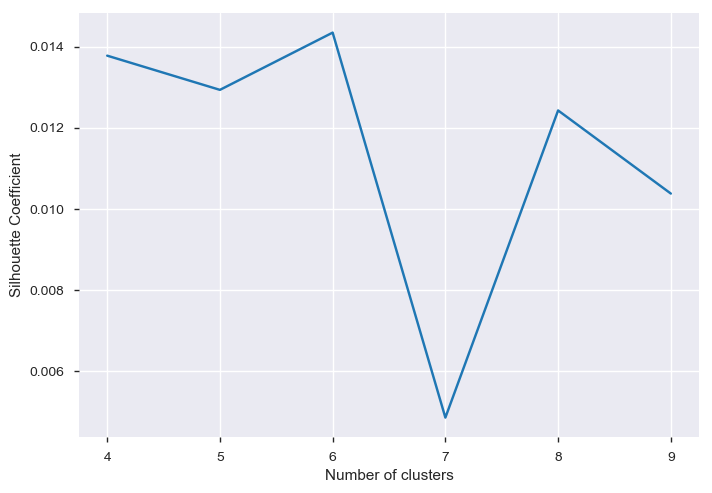

In [53]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [54]:
km_6=KMeans(n_clusters=6,init='k-means++',random_state=123).fit(X_train_tfidf)

In [55]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=6, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [102]:
# view the topic models
n_top_words = 40
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['education russian higher work higher education work experience russian language relevant knowledge russian field english computer knowledge english good excellent relevant field plus experience relevant english language language knowledge excellent knowledge computer skill university communication skill university degree communication russian english medical internet degree english russian french technical basic year good knowledge language plus office medicine fluency',
 'ability management work excellent degree project written english year strong communication international working business field least good organization english language ability work communication skill proven related interpersonal university development team relevant fluency least year computer professional training public oral including university degree skill ability writing social',
 'driving license driving license driver valid car driver license electrical b ability valid driving availability work basic knowle

In [103]:
list = pd.Series(['Higher education and language','Project management','IT operations','Communication','Accounting and finance','IT application development'])
list

0    Higher education and language
1               Project management
2                    IT operations
3                    Communication
4           Accounting and finance
5       IT application development
dtype: object

In [104]:
topic_summaries = pd.DataFrame(topic_summaries)
topic_summaries['Cluster Number'] = np.arange(1,7)
topic_summaries['Interpretation'] = list
topic_summaries.columns = ['Terms','Cluster Number','Interpretation'] 
topic_summaries

,Terms,Cluster Number,Interpretation
0,education russian higher work higher education...,1,Higher education and language
1,ability management work excellent degree proje...,2,Project management
2,driving license driving license driver valid c...,3,IT operations
3,excellent work ability russian good ability wo...,4,Communication
4,accounting fice banking legislation ficial ban...,5,Accounting and finance
5,good development c design sql ability web plus...,6,IT application development


### Drop the extra Column created for analysis

In [328]:
job.drop(columns=['Armenia'],inplace=True)

nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')

In [329]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'AboutC', 'Year', 'Month', 'IT'],
      dtype='object')

### Creating Seperate Dataset for Numerical and Categorical Vars

In [126]:
cat_var = job.columns.difference(['Year','Month'])
num_var = ['Year','Month']

In [127]:
job_cat = job[cat_var]
job_num = job[num_var]

In [128]:
job_cat.head(2)

,AboutC,Company,IT,JobDescription,JobRequirment,Location,RequiredQual,Title,jobpost
0,,ameria investment consulting,False,ameria investment consulting seeking achief fi...,supervises ficial management administrative st...,,perform successfully anindividual must able pe...,chief ficial officer,ameria investment consulting companyjob chief ...
1,international research exchange board irex isa...,international research exchange board irex,False,,,irex main office description irex currently se...,bachelor degree master preferred excellent ski...,fulltime community connection intern paid inte...,international research & exchange board irexti...


In [129]:
job_num.head(2)

,Year,Month
0,2004,1
1,2004,1


### Create Dummies

In [130]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=False)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [131]:
vars = ['Year','Month']

for c_feature in vars:
    job_num[c_feature] = job_num[c_feature].astype('category')
    job_num = create_dummies(job_num , c_feature )
    
job_num.head(3)

,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking for missing Values in Categorical Dataset

In [132]:
job_cat.isna().any().sum()

0

In [133]:
job_cat.Location.value_counts().reset_index().head(2)

,index,Location
0,,17110
1,gyumri,105


In [134]:
job_cat.isna().any().sum()

0

In [135]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'AboutC', 'Year', 'Month', 'IT'],
      dtype='object')

## 2. Find out Desired characteristics and skill sets of candidates based on Job Description

### Split the data into train & Test for WORDCLOUD preparation

In [153]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y

X = job.JobDescription
y = job.Title

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14188,)
(4730,)
(14188,)
(4730,)


### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [154]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ),
                             stop_words=stop,
                             min_df=3,
                            max_df=0.97,
                            max_features=1500)
xtrain_count = count_vect.fit_transform(X_train)

In [155]:
xtrain_count

<14188x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 175109 stored elements in Compressed Sparse Row format>

### View the document term metrics


In [156]:
dtm=xtrain_count.toarray()

In [157]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
count_vect.get_feature_names()

['ability',
 'ability adapt',
 'able',
 'able work',
 'academy',
 'access',
 'accordance',
 'according',
 'account',
 'accountable',
 'accountant',
 'accountant responsible',
 'accounting',
 'accuracy',
 'accurate',
 'achieve',
 'achievement',
 'achieving',
 'across',
 'act',
 'action',
 'action plan',
 'active',
 'actively',
 'actively looking',
 'activity',
 'activity related',
 'ad',
 'adapt',
 'adb',
 'addition',
 'address',
 'administration',
 'administrative',
 'administrative assistant',
 'administrative support',
 'administrator',
 'administrator responsible',
 'adp',
 'advanced',
 'advanced software',
 'advertising',
 'advice',
 'adviser',
 'advising',
 'advisor',
 'advisory',
 'advocacy',
 'affair',
 'agency',
 'agent',
 'agile',
 'agreement',
 'agricultural',
 'agriculture',
 'aim',
 'aimed',
 'airport',
 'also',
 'also responsible',
 'altacode',
 'american',
 'among',
 'amotivated',
 'analysis',
 'analyst',
 'analytical',
 'analyze',
 'analyzing',
 'anddevelopment',
 'andex

In [159]:
dtm1 = pd.DataFrame(dtm)
dtm1.columns = count_vect.get_feature_names()
dtm1.head()

,ability,ability adapt,able,able work,academy,access,accordance,according,account,accountable,...,world bank,world vision,would,write,writing,written,wv,year,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorization (count, tfidf) for both train & test

In [160]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 3 ), 
                             min_df=3,
                             max_df=0.97,
                             stop_words=stop,
                             max_features=1500)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [161]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [162]:
dtm2.head()

,ability,ability adapt,able,able work,access,accordance,according,account,accountable,accountant,...,world bank,world vision,would,write,writing,written,wv,year,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
frequency_words_wo_stop= {}
for data in job['JobDescription']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                


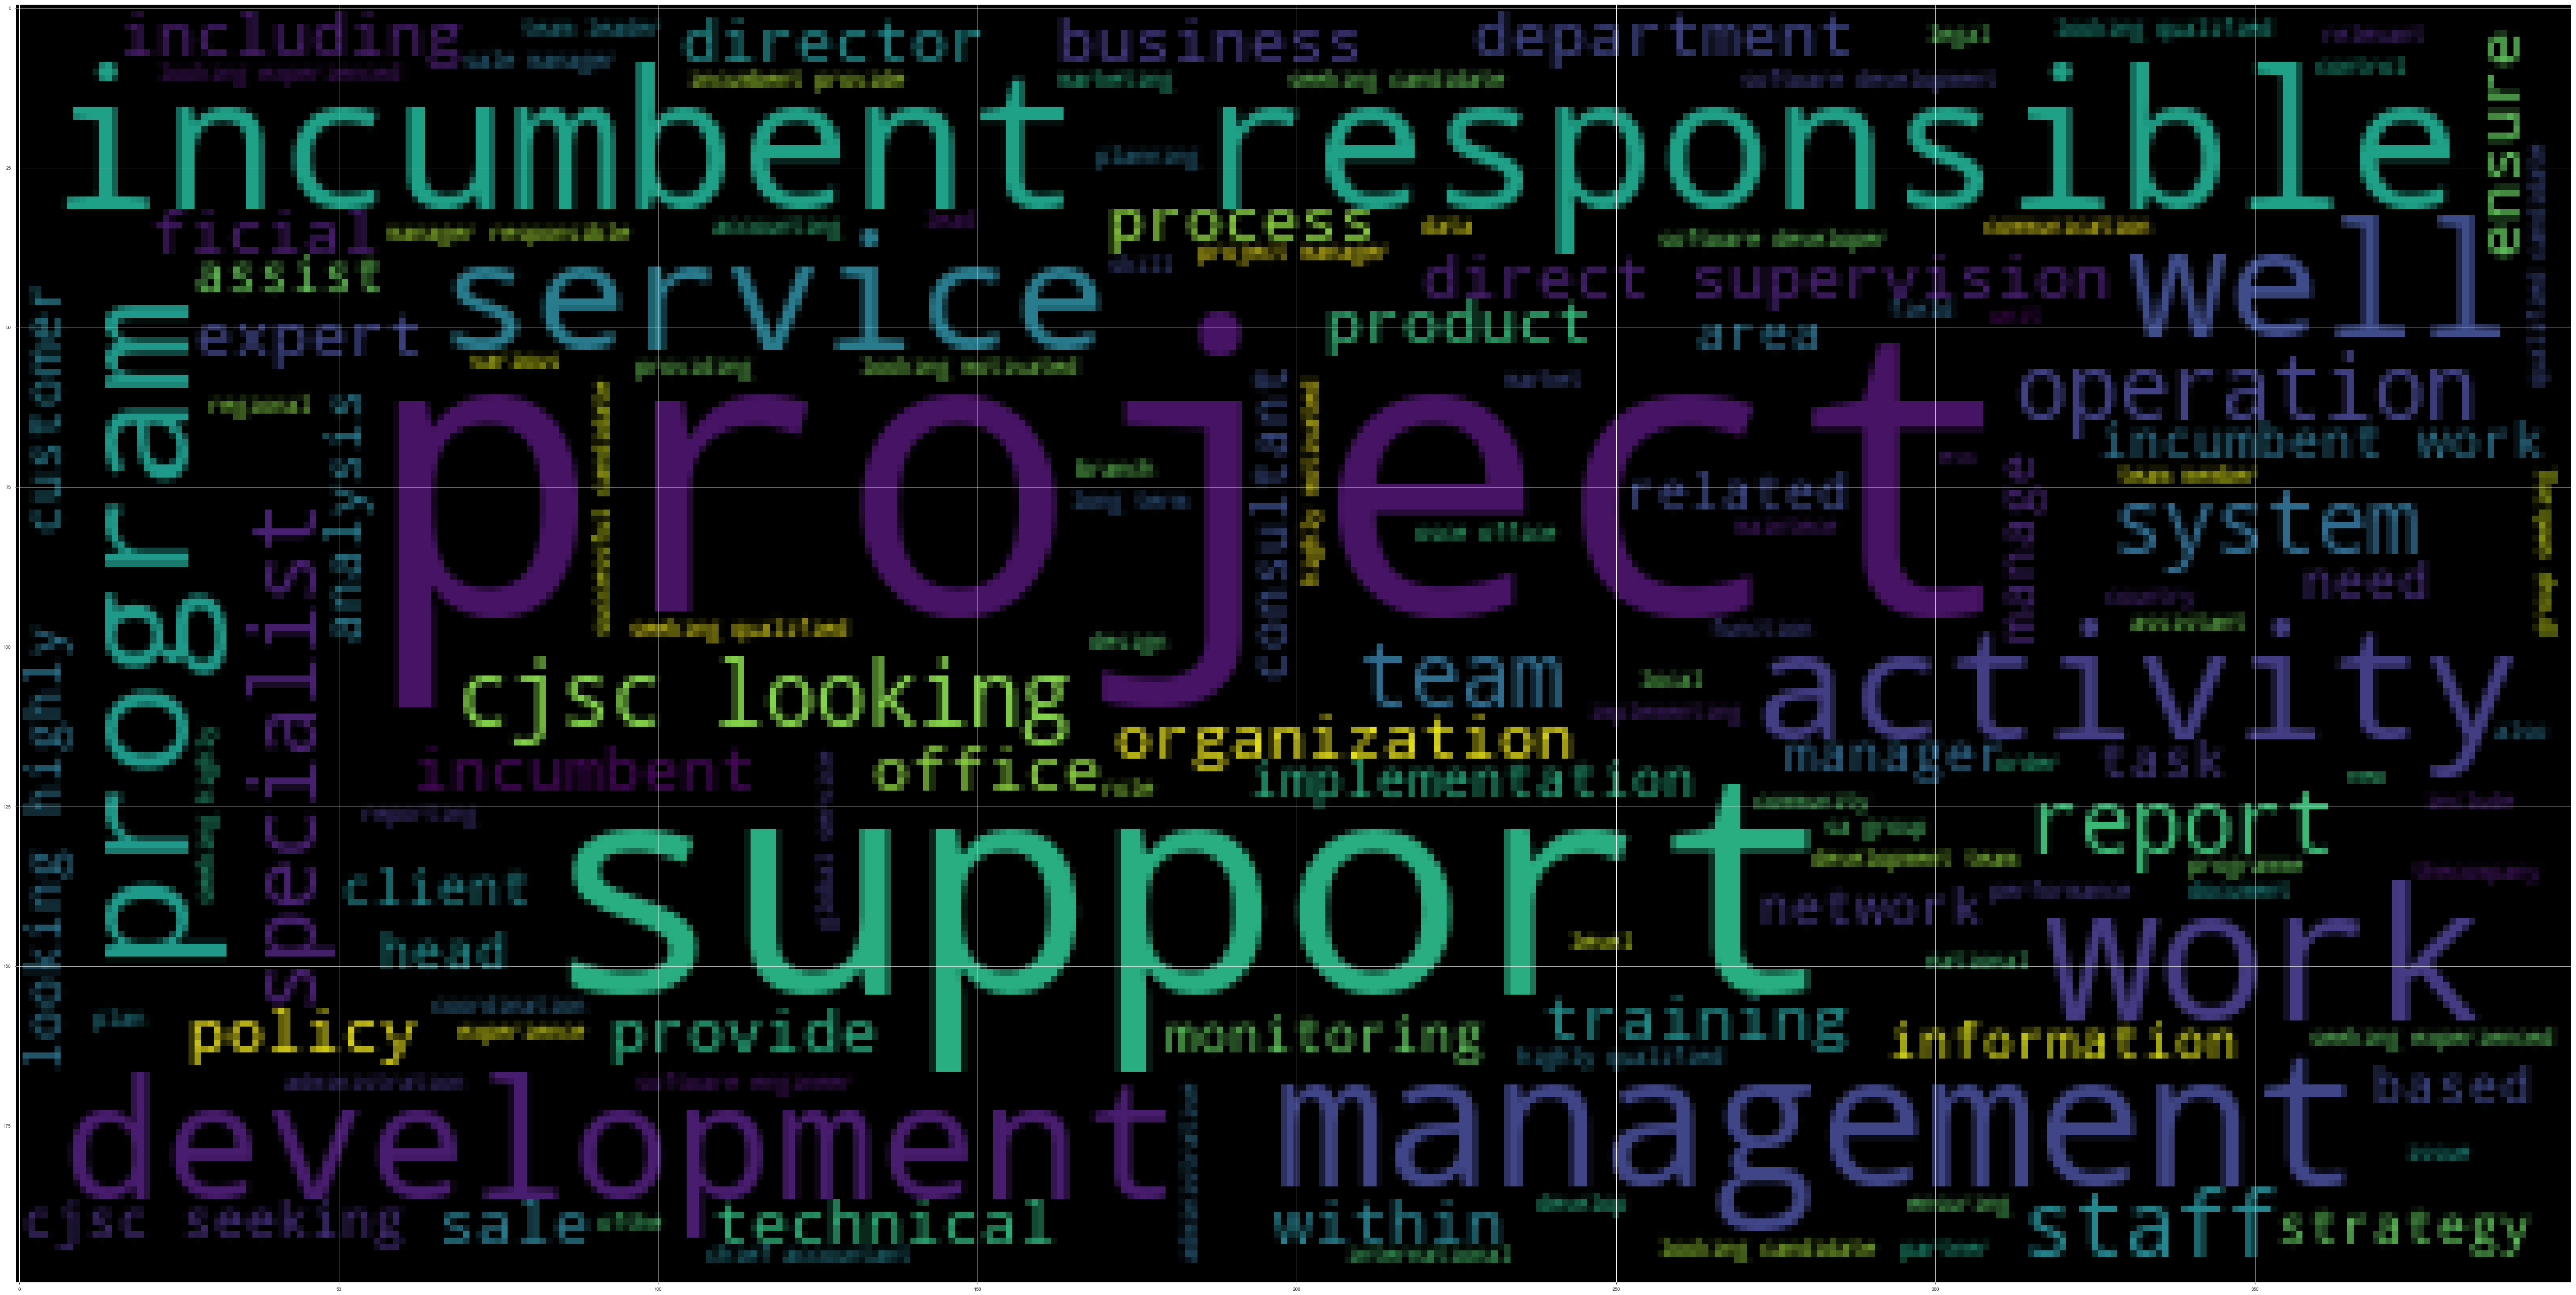

In [164]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [168]:
from sklearn.cluster import KMeans

k_range = range(4, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k,init='k-means++',random_state=123)
    km.fit(X_train_tfidf)
    scores.append(metrics.silhouette_score(X_train_tfidf, km.labels_))

In [169]:
scores

[0.08977381713268326,
 0.06845644915506349,
 0.06265897137299348,
 0.09072609569620382,
 0.07149305001672598,
 0.08698236363794784]

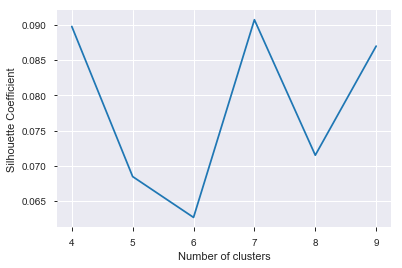

In [170]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [171]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=7, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [174]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [175]:
topic_summaries

['software team design development developer web looking highly engineer seeking',
 'looking motivated language medical bank representative cjsc english skill looking motivated',
 'incumbent responsible project incumbent responsible activity support program management manager service',
 'looking sale seeking candidate accountant qualified manager cjsc accounting looking qualified',
 'experienced looking experienced perform seeking experienced seeking office day looking developer web developer',
 'fulfill responsible engineer system qa participate test administrator maintece incumbent',
 'product longterm ltd looking longterm project primary objective java primary deal ceo senior software']

## 3. Build a Classifier to predict IT Jobs from the Job Description & Company Description

### Split Data Set for Job Description

In [176]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'AboutC', 'Year', 'Month', 'IT'],
      dtype='object')

In [177]:
job.IT.value_counts()

False    15168
True      3750
Name: IT, dtype: int64

In [178]:
# define X and y
X1 = job.JobDescription
X2 = job.AboutC
y = job.IT

# split the new DataFrame into training and testing sets
job_train, job_test, yjob_train, yjob_test = train_test_split(X1, y, random_state=1)
com_train, com_test, ycom_train, ycom_test = train_test_split(X2, y, random_state=1)

In [179]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


### Vectorization

In [180]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), 
                             stop_words=stop,
                             encoding='latin-1' , 
                             max_features=1500)

job_train_count = pd.DataFrame(count_vect.fit_transform(job_train).todense(),columns=count_vect.get_feature_names())
com_train_count = pd.DataFrame(count_vect.fit_transform(com_train).todense(),columns=count_vect.get_feature_names())

tfidf_transformer = TfidfTransformer()
job_train_tfidf = pd.DataFrame(tfidf_transformer.fit_transform(job_train_count).todense(),columns=count_vect.get_feature_names())
com_train_tfidf = pd.DataFrame(tfidf_transformer.fit_transform(com_train_count).todense(),columns=count_vect.get_feature_names())

#Test
#count_vect = CountVectorizer()
job_test_count = pd.DataFrame(count_vect.transform(job_test).todense(),columns=count_vect.get_feature_names())
com_test_count = pd.DataFrame(count_vect.transform(com_test).todense(),columns=count_vect.get_feature_names())

#tfidf_transformer = TfidfTransformer()
job_test_tfidf = pd.DataFrame(tfidf_transformer.transform(job_test_count).todense(),columns=count_vect.get_feature_names())
com_test_tfidf = pd.DataFrame(tfidf_transformer.transform(com_test_count).todense(),columns=count_vect.get_feature_names())

In [181]:
##Train
train_count = pd.concat([job_train_count,com_train_count],axis=1)
train_tfidf = pd.concat([job_train_tfidf,com_train_tfidf],axis=1)

In [182]:
##Test
test_count = pd.concat([job_test_count,com_test_count],axis=1)
test_tfidf = pd.concat([job_test_tfidf,com_test_tfidf],axis=1)

ros = RandomOverSampler(random_state=6789)
train_count_ros, y_train_count_ros = ros.fit_sample(train_count,y_train)
test_count_ros, y_test_count_ros = ros.fit_sample(test_count,y_test)

train_tfidf_ros, y_train_tfidf_ros = ros.fit_sample(train_tfidf,y_train)
test_tfidf_ros, y_test_tfidf_ros = ros.fit_sample(test_tfidf,y_test)

### Create Logistic Regression, SVC & ANN Models

In [183]:
lr = LogisticRegression()
lr.fit(train_tfidf,yjob_train)
predictions = lr.predict(test_tfidf)

In [184]:
print(metrics.confusion_matrix(predictions,yjob_test))
print(metrics.roc_auc_score(predictions,yjob_test))
print(metrics.accuracy_score(predictions,yjob_test))

[[3757  867]
 [  37   69]]
0.7317216981132075
0.8088794926004228


In [185]:
print(metrics.classification_report(predictions,yjob_test))

              precision    recall  f1-score   support

       False       0.99      0.81      0.89      4624
        True       0.07      0.65      0.13       106

    accuracy                           0.81      4730
   macro avg       0.53      0.73      0.51      4730
weighted avg       0.97      0.81      0.88      4730



In [186]:
predictions = lr.predict(train_tfidf)
print(metrics.confusion_matrix(predictions,yjob_train))
print(metrics.roc_auc_score(predictions,yjob_train))
print(metrics.accuracy_score(predictions,yjob_train))

[[11203   814]
 [  171  2000]]
0.9267485410561662
0.9305751339159853


In [187]:
print(metrics.classification_report(predictions,yjob_train))

              precision    recall  f1-score   support

       False       0.98      0.93      0.96     12017
        True       0.71      0.92      0.80      2171

    accuracy                           0.93     14188
   macro avg       0.85      0.93      0.88     14188
weighted avg       0.94      0.93      0.93     14188



In [188]:
lr = LogisticRegression()
lr.fit(train_count,yjob_train)
predictions = lr.predict(test_count)

In [189]:
print(metrics.confusion_matrix(predictions,yjob_test))
print(metrics.roc_auc_score(predictions,yjob_test))
print(metrics.accuracy_score(predictions,yjob_test))

[[3612  826]
 [ 182  110]]
0.5952962274750443
0.786892177589852


In [190]:
print(metrics.classification_report(predictions,yjob_test))

              precision    recall  f1-score   support

       False       0.95      0.81      0.88      4438
        True       0.12      0.38      0.18       292

    accuracy                           0.79      4730
   macro avg       0.53      0.60      0.53      4730
weighted avg       0.90      0.79      0.83      4730



In [191]:
svc = svm.LinearSVC()
svc.fit(train_tfidf,yjob_train)
predictions = svc.predict(test_tfidf)
print(metrics.confusion_matrix(predictions,yjob_test))
print(metrics.roc_auc_score(predictions,yjob_test))
print(metrics.accuracy_score(predictions,yjob_test))

[[3472  759]
 [ 322  177]]
0.5876596018792488
0.7714587737843552


In [192]:
svc = svm.LinearSVC()
svc.fit(train_count,yjob_train)
predictions = svc.predict(test_count)
print(metrics.confusion_matrix(predictions,yjob_test))
print(metrics.roc_auc_score(predictions,yjob_test))
print(metrics.accuracy_score(predictions,yjob_test))

[[3389  772]
 [ 405  164]]
0.5513463160513412
0.7511627906976744


In [193]:
print(metrics.classification_report(predictions,yjob_test))

              precision    recall  f1-score   support

       False       0.89      0.81      0.85      4161
        True       0.18      0.29      0.22       569

    accuracy                           0.75      4730
   macro avg       0.53      0.55      0.53      4730
weighted avg       0.81      0.75      0.78      4730



In [194]:
#ANN
# ANN on Count Vectors and TF-IDF
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate='constant',learning_rate_init=0.001,alpha=0.25)
mlp.fit(train_tfidf, yjob_train)

MLPClassifier(activation='relu', alpha=0.25, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [195]:
pred_ann_train = mlp.predict(train_tfidf)
pred_ann_test = mlp.predict(test_tfidf)

In [196]:
print(metrics.roc_auc_score(pred_ann_test,yjob_test))
print(metrics.accuracy_score(pred_ann_test,yjob_test))

0.5893092668722164
0.7678646934460888


In [197]:
print(metrics.classification_report(pred_ann_test,yjob_test))

              precision    recall  f1-score   support

       False       0.90      0.82      0.86      4170
        True       0.21      0.36      0.27       560

    accuracy                           0.77      4730
   macro avg       0.56      0.59      0.56      4730
weighted avg       0.82      0.77      0.79      4730



In [198]:
metrics.confusion_matrix(pred_ann_test,yjob_test)

array([[3433,  737],
       [ 361,  199]], dtype=int64)

In [199]:
metrics.confusion_matrix(pred_ann_train,yjob_train)

array([[11329,   213],
       [   45,  2601]], dtype=int64)

## Recurrent Neural Network Build

pip install keras

pip install TensorFlow

In [216]:
import tensorflow as tf
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [226]:
len(train_count)

14188

In [238]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=train_count.shape[0], 
                           output_dim=1, 
                           input_length=3000))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [239]:
import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',auc])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 3000, 1)           14188     
_________________________________________________________________
flatten_12 (Flatten)         (None, 3000)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                30010     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 44,209
Trainable params: 44,209
Non-trainable params: 0
_________________________________________________________________


In [240]:
history = model.fit(train_tfidf, yjob_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(test_tfidf, yjob_test),
                    batch_size=20)
accuracy = model.evaluate(train_tfidf, yjob_train, verbose=True)

Train on 14188 samples, validate on 4730 samples
Epoch 1/10
14188/14188 [==============================] - 5s 358us/step - loss: 0.5030 - accuracy: 0.8017 - auc: 0.4980 - val_loss: 0.4975 - val_accuracy: 0.8021 - val_auc: 0.4992
Epoch 2/10
14188/14188 [==============================] - 5s 352us/step - loss: 0.4993 - accuracy: 0.8017 - auc: 0.5020 - val_loss: 0.4975 - val_accuracy: 0.8021 - val_auc: 0.5022
Epoch 3/10
14188/14188 [==============================] - 5s 335us/step - loss: 0.4993 - accuracy: 0.8017 - auc: 0.5017 - val_loss: 0.4978 - val_accuracy: 0.8021 - val_auc: 0.5018
Epoch 4/10
14188/14188 [==============================] - 5s 343us/step - loss: 0.4999 - accuracy: 0.8017 - auc: 0.5006 - val_loss: 0.4975 - val_accuracy: 0.8021 - val_auc: 0.4996
Epoch 5/10
14188/14188 [==============================] - 5s 341us/step - loss: 0.4997 - accuracy: 0.8017 - auc: 0.4992 - val_loss: 0.4975 - val_accuracy: 0.8021 - val_auc: 0.4993
Epoch 6/10
14188/14188 [===========================

In [237]:
history = model.fit(train_count, yjob_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(test_count, yjob_test),
                    batch_size=20)
accuracy = model.evaluate(train_count, yjob_train, verbose=True)

Train on 14188 samples, validate on 4730 samples
Epoch 1/10
14188/14188 [==============================] - 6s 399us/step - loss: 0.2802 - accuracy: 0.8941 - auc: 0.5124 - val_loss: 0.4657 - val_accuracy: 0.8148 - val_auc: 0.5253
Epoch 2/10
14188/14188 [==============================] - 5s 348us/step - loss: 0.2008 - accuracy: 0.9247 - auc: 0.5384 - val_loss: 0.5180 - val_accuracy: 0.8101 - val_auc: 0.5504
Epoch 3/10
14188/14188 [==============================] - 5s 354us/step - loss: 0.1789 - accuracy: 0.9347 - auc: 0.5619 - val_loss: 0.5745 - val_accuracy: 0.8068 - val_auc: 0.5730
Epoch 4/10
14188/14188 [==============================] - 5s 351us/step - loss: 0.1651 - accuracy: 0.9397 - auc: 0.5835 - val_loss: 0.6338 - val_accuracy: 0.8000 - val_auc: 0.5934
Epoch 5/10
14188/14188 [==============================] - 5s 344us/step - loss: 0.1544 - accuracy: 0.9423 - auc: 0.6028 - val_loss: 0.6886 - val_accuracy: 0.7981 - val_auc: 0.6117
Epoch 6/10
14188/14188 [===========================

### Conclusion

Looking at the designs of the models, the Accuracy and ROC for Term Frequency values involved in RNN Model looks best.

## 4.Similarity of Jobs - Given a Job Title, Find the top 5 Jobs that are of similar nature, based on the Job Post

In [345]:
job.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'AboutC', 'Year', 'Month', 'IT'],
      dtype='object')

In [450]:
job_final = job[['Title','JobDescription','JobRequirment', 'RequiredQual']]

In [451]:
job_final = job_final[job_final.Title == 'chief financial officer'].reset_index()
job_final.drop(columns=['index'],inplace=True)
job_final.iloc[0]

Title                                       chief financial officer
JobDescription    ameria investment consulting seeking achief fi...
JobRequirment     supervises financial management administrative...
RequiredQual      perform successfully anindividual must able pe...
Name: 0, dtype: object

In [463]:
job_final['JobDescription_Token'] = np.arange(0,job_final.shape[0])
job_final['JobDescription_Token_str'] = np.arange(0,job_final.shape[0])
job_final['JobRequirment_Token'] = np.arange(0,job_final.shape[0])
job_final['JobRequirment_Token_str'] = np.arange(0,job_final.shape[0])
job_final['RequiredQual_Token'] = np.arange(0,job_final.shape[0])
job_final['RequiredQual_Token_str'] = np.arange(0,job_final.shape[0])

for i in np.arange(0,job_final.shape[0]):
        X1 = job_final.iloc[i].JobDescription
        X2 = job_final.iloc[i].JobRequirment
        X3 = job_final.iloc[i].RequiredQual
    
        job_final['JobDescription_Token'][i]=(X1.split())
        job_final['JobDescription_Token_str'][i]=' '.join(X1.split())
        
        job_final['JobRequirment_Token'][i]=(X2.split())
        job_final['JobRequirment_Token_str'][i]=' '.join(X2.split())
        
        job_final['RequiredQual_Token'][i]=(X3.split())
        job_final['RequiredQual_Token_str'][i]=' '.join(X3.split())

job_final.iloc[0]
        

Title                                                 chief financial officer
JobDescription              ameria investment consulting seeking achief fi...
JobRequirment               supervises financial management administrative...
RequiredQual                perform successfully anindividual must able pe...
JobDescription_Token        [ameria, investment, consulting, seeking, achi...
JobDescription_Token_str    ameria investment consulting seeking achief fi...
JobRequirment_Token         [supervises, financial, management, administra...
JobRequirment_Token_str     supervises financial management administrative...
RequiredQual_Token          [perform, successfully, anindividual, must, ab...
RequiredQual_Token_str      perform successfully anindividual must able pe...
Name: 0, dtype: object

In [464]:
job_final.head()

,Title,JobDescription,JobRequirment,RequiredQual,JobDescription_Token,JobDescription_Token_str,JobRequirment_Token,JobRequirment_Token_str,RequiredQual_Token,RequiredQual_Token_str
0,chief financial officer,ameria investment consulting seeking achief fi...,supervises financial management administrative...,perform successfully anindividual must able pe...,"[ameria, investment, consulting, seeking, achi...",ameria investment consulting seeking achief fi...,"[supervises, financial, management, administra...",supervises financial management administrative...,"[perform, successfully, anindividual, must, ab...",perform successfully anindividual must able pe...
1,chief financial officer,cascade capital holding cjsc looking amotivate...,create oversee financial reporting system incl...,university degree relevant field accacpacfamba...,"[cascade, capital, holding, cjsc, looking, amo...",cascade capital holding cjsc looking amotivate...,"[create, oversee, financial, reporting, system...",create oversee financial reporting system incl...,"[university, degree, relevant, field, accacpac...",university degree relevant field accacpacfamba...
2,chief financial officer,finca looking fulfill new opening thechief fin...,nan,extensive experience bestpractice financial ma...,"[finca, looking, fulfill, new, opening, thechi...",finca looking fulfill new opening thechief fin...,[nan],nan,"[extensive, experience, bestpractice, financia...",extensive experience bestpractice financial ma...
3,chief financial officer,echmiadzin cannery echmiadzni pahatsoneri gort...,responsible establishing furthermaintenance ne...,extensive experience bestpractice financial ma...,"[echmiadzin, cannery, echmiadzni, pahatsoneri,...",echmiadzin cannery echmiadzni pahatsoneri gort...,"[responsible, establishing, furthermaintenance...",responsible establishing furthermaintenance ne...,"[extensive, experience, bestpractice, financia...",extensive experience bestpractice financial ma...
4,chief financial officer,chief financial officer two keyresponsibilitie...,develop program budget total program period we...,master degree equivalent financial management ...,"[chief, financial, officer, two, keyresponsibi...",chief financial officer two keyresponsibilitie...,"[develop, program, budget, total, program, per...",develop program budget total program period we...,"[master, degree, equivalent, financial, manage...",master degree equivalent financial management ...


In [530]:
job_final['Similarity Score'] = np.arange(0,job_final.shape[0])

In [531]:
vectorizer = TfidfVectorizer()
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [548]:
Tfidf_scores = []
X = job_final.JobDescription[0] + job_final.RequiredQual[0] + job_final.JobRequirment[0]
for i in range(1,job_final.shape[0]):
    Y = job_final.JobDescription[i] + job_final.RequiredQual[i] + job_final.JobRequirment[i]
    score = cosine_sim(X, Y)
    job_final['Similarity Score'][i] = "{:1.3f}".format(score)
    Tfidf_scores.append(score)
    
Tfidf_scores

[0.27532914304774386,
 0.25702966552991247,
 0.28825807067020276,
 0.2205278552834964,
 0.2731390970728545,
 0.2205278552834964,
 0.2791647687253785,
 0.3133065067243003,
 0.2808650763209192,
 0.2877295699588436,
 0.2902301132894534,
 0.2877295699588436,
 0.3106127587753322,
 0.3131855657944735,
 0.2609534778093692,
 0.32487534613454316,
 0.33299184701296103,
 0.37252042396562646,
 0.3879354341289662,
 0.29820207081145406,
 0.2559976114447697,
 0.21144908453271902,
 0.3070272621448172,
 0.3387487043676674,
 0.3152016718871675,
 0.361213036382684,
 0.26077099762260497,
 0.26427032776117976,
 0.28374067360234567,
 0.18832618046171956]

In [549]:
job_final['Similarity Score'].tail()

5     0.273
4     0.221
3     0.288
2     0.257
30    0.188
Name: Similarity Score, dtype: object

In [551]:
job_final

,Title,JobDescription,JobRequirment,RequiredQual,JobDescription_Token,JobDescription_Token_str,JobRequirment_Token,JobRequirment_Token_str,RequiredQual_Token,RequiredQual_Token_str,Similarity Score
0,chief financial officer,ameria investment consulting seeking achief fi...,supervises financial management administrative...,perform successfully anindividual must able pe...,"[ameria, investment, consulting, seeking, achi...",ameria investment consulting seeking achief fi...,"[supervises, financial, management, administra...",supervises financial management administrative...,"[perform, successfully, anindividual, must, ab...",perform successfully anindividual must able pe...,0
16,chief financial officer,nextarmenia seeking dynamic energetic chieffin...,enhance develop implement financial policy whi...,bachelor degree accounting master degree finan...,"[nextarmenia, seeking, dynamic, energetic, chi...",nextarmenia seeking dynamic energetic chieffin...,"[enhance, develop, implement, financial, polic...",enhance develop implement financial policy whi...,"[bachelor, degree, accounting, master, degree,...",bachelor degree accounting master degree finan...,0.325
29,chief financial officer,republica hotel seeking candidate positionof c...,monitor control daytoday accounting reporting ...,university degree accounting finance related f...,"[republica, hotel, seeking, candidate, positio...",republica hotel seeking candidate positionof c...,"[monitor, control, daytoday, accounting, repor...",monitor control daytoday accounting reporting ...,"[university, degree, accounting, finance, rela...",university degree accounting finance related f...,0.284
28,chief financial officer,incumbent provide operational andprogrammatic ...,prepare maintain regular financial planning re...,university degree preferably master degree bus...,"[incumbent, provide, operational, andprogramma...",incumbent provide operational andprogrammatic ...,"[prepare, maintain, regular, financial, planni...",prepare maintain regular financial planning re...,"[university, degree, preferably, master, degre...",university degree preferably master degree bus...,0.264
27,chief financial officer,incumbent provide operational andprogrammatic ...,prepare maintain regular financial planning re...,university degree preferably mba finance accou...,"[incumbent, provide, operational, andprogramma...",incumbent provide operational andprogrammatic ...,"[prepare, maintain, regular, financial, planni...",prepare maintain regular financial planning re...,"[university, degree, preferably, mba, finance,...",university degree preferably mba finance accou...,0.261
26,chief financial officer,chief financial officer cfo support thechief e...,financial management nsrcip project preparatio...,degree accounting finance business law public ...,"[chief, financial, officer, cfo, support, thec...",chief financial officer cfo support thechief e...,"[financial, management, nsrcip, project, prepa...",financial management nsrcip project preparatio...,"[degree, accounting, finance, business, law, p...",degree accounting finance business law public ...,0.361
25,chief financial officer,newlita seeking chief financial officer tointe...,support annual budgeting process gathering inf...,master degree finance accounting acca plus yea...,"[newlita, seeking, chief, financial, officer, ...",newlita seeking chief financial officer tointe...,"[support, annual, budgeting, process, gatherin...",support annual budgeting process gathering inf...,"[master, degree, finance, accounting, acca, pl...",master degree finance accounting acca plus yea...,0.315
24,chief financial officer,river island seeking chief financial officer w...,develop tool system provide critical financial...,master degree management finance economics lea...,"[river, island, seeking, chief, financial, off...",river island seeking chief financial officer w...,"[develop, tool, system, provide, critical, fin...",develop tool system provide critical financial...,"[m

In [465]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

nltk.download('punkt')